#  Ch11. Working with Unlabeled Data - Clustering Analysis

<strong>딥사이어인 김성동</strong>

이전 장까지는 이미 답(레이블)을 알고 있는 데이터셋을 가지고 지도 학습을 다뤘었다. 이번 장에서는 데이터의 숨겨진 구조를 찾아내는 비지도학습의 하나인 Cluster analysis를 배워보겠다.

* Finding centers of similarity using the popular k-means algorithm
* Using a bottom-up approach to build hierarchical cluster trees
* Identifying arbitrary shapes of objects using a density-based clustering approach

## Grouping objects by similarity using k-means

이 섹션에서는 가장 대중적인 clustering 알고리즘인 k-means에 대해 다루겠다. 

Clustering은 유사한 것들의 그룹을 찾아내는 테크닉이다. 
즉, 이 데이터(object)는 다른 그룹보다 이 그룹에 더 연관되어 있음을 밝히는 것이다.
예를 들어 문서, 음악, 영화 등을 유사한 그룹으로 묶는다던지 구매 기록을 바탕으로 유사한 관심사를 공유하는 고객 집단을 찾아낼 수도 있다.

지금부터 볼 것이지만, k-means 알고리즘은 아주 실행하기 쉬울뿐만 아니라 다른 clustering 알고리즘과 비교했을 때 계산 비용이 적다. 
<hr>
<li><strong style="color: red;">Prototype-based</strong></li>
<li>Hierarchical-based</li>
<li>Density-based</li>

### Prototype-based 

각 cluster를 하나의 prototype 볼 수 있다는 의미. (변수의 유사한 평균 지점인 <strong>centroid</strong>(average) 혹은 어떠한 카테고리적 특징을 대표한 지점 <strong>medoid</strong>으로 볼 수 있다.)

한가지 단점은 적절한 K의 갯수를 위해 선험적 지식이 있어야 한다는 것이다. (적절한 k를 정하는게 쉽지 않음) 추후에 적절한 k를 고르는 테크닉 중 <strong>elbow</strong> 기법과 <strong>silhouette plots</strong>을 소개할 것이다.

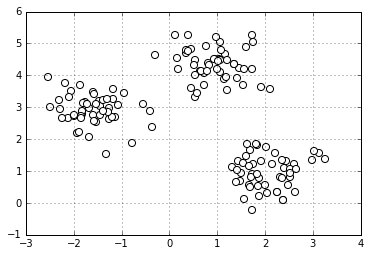

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0],
            X[:,1],
            c='white', 
            marker='o',
            s=50)

plt.grid() 
plt.show()

간단히 2차원 상에 플롯팅해보기 위한 예제인데 150개의 점을 3개의 센터를 가지도록 데이터를 생성해냈다. 

실제 세계에서는 이러한 샘플들의 카테고리 정보에 대한 사전 지식이 없다. 만약 알고 있다면 지도 학습이 될 것이다. 

그러므로 우리의 목적은 그들의 feature similarities를 기반으로 그룹핑을 하는 것이다. 이러한 k-means 알고리즘은 아래의 4 스텝으로 요약할 수 있다.

<hr>

1. 초기 cluster center로서 랜덤하게 아무 점이나 k개 선택한다.

2. 각 다른 점들을 centroid(1번에서 정한 중심점) 중 가장 가까운 곳으로 할당한다.

3. cluster를 할당한 이후 다시 그 cluster 사이에서 중심점을 정한다.

4. 2번과 3번 과정을 cluster assignment가 거의 안 바뀔 때까지 혹은 유저가 정한 maximum number of iterations에 도달할 때까지 반복


In [1]:
from IPython.display import Image

###  Squared Euclidean distance

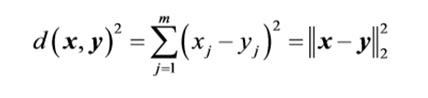

In [3]:
Image(filename='./image/ch11/image1.jpg', width=500) 

### within cluster sum of squared errors (SSE) 

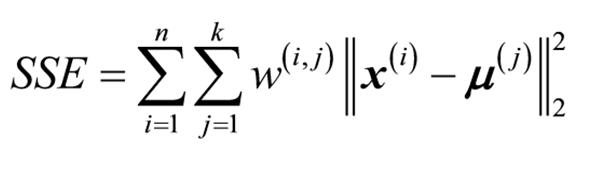

In [5]:
Image(filename='./image/ch11/image2.jpg', width=500) 

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random', # 'k-means++' (default)
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0) 

y_km = km.fit_predict(X) 

In [8]:
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

In [7]:
len(y_km)

150

n_init은 clustering 알고리즘을 독립적으로 n번 시행하여 가장 SSE가 작은 결과를 돌려주겠다는 뜻 (1번 스텝에서 초기 centroid를 랜덤으로 뽑기 때문에 이에 따라 성능이 매번 달라진다)
<hr>
어떠한 시행에서는 k-means가 수렴하지 못하고 계산적으로 비싸질 수가 있다. (max_iter를 상대적으로 높게 잡았을 때) 이러한 문제에 대처하는 한가지 방법은 withn-cluster SSE가 잘 수렴하도록 tolerance를 조정하는 파라미터인 <i>tol</i>를 높게 선택하면 된다.

## K-means++ 

지금까지는 initial centroids를 정하는데 랜덤한 방법을 사용하는 아주 클래식한 k-means 알고리즘을 다뤘다. 이러한 방식은 initial centroids가 나쁘게 선택되면 아주 안좋은 클러스터링 결과를 내게 된다. 
<hr>
이러한 문제에 대처하는 한가지 방법은 여러번 시행해서 가장 SSE가 적은 model을 선택하거나 
<hr>
initial centroids를 정하는 방법에 있어 <strong style="color: red;">k-means++</strong>를 사용하는 것이다. 

1. k centroids를 저장한 빈 set M을 초기화 한다.

2. 첫 centroid를 랜덤하게 뽑아서 M에 저장한다.

3. 뽑힌 점을 제외한 나머지 샘플과 M에 저장한 centroid의 minimum squared distance를 찾는다.

4. 랜덤하게 다음 centroid를 뽑기 위해 가중 확률 분포를 사용한다.

5. 2번과 3번 스텝을 k centroids가 뽑힐 때까지 반복

6. classic k-means를 진행한다.

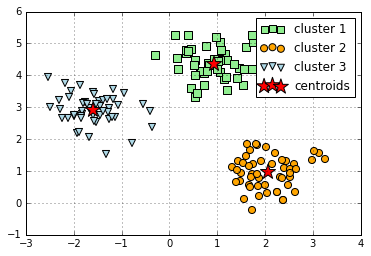

In [13]:
 plt.scatter(X[y_km==0,0],
             X[y_km ==0,1],
             s=50,
             c='lightgreen',
             marker='s',
             label='cluster 1')

plt.scatter(X[y_km ==1,0],
            X[y_km ==1,1],
            s=50, 
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_km ==2,0],
            X[y_km ==2,1], 
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3') 

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend() 
plt.grid()
plt.show()

## Hard versus soft clustering 

### Hard clustring

앞서 본 k-means처럼 각 샘플이 하나의 클러스터로 할당

### Soft clustering(fuzzy clustering) 

각 샘플이 하나 혹은 여러 개의 클러스터에 속할 수 있다.

* fuzzy C-means (FCM) (soft k-means or fuzzy k-means)

FCM의 절차는 k-means와 유사하지만 각 점이 각 cluster에 속하는 것을 확률로 나타낸다.

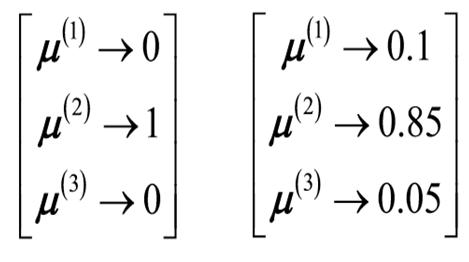

In [14]:
Image(filename='./image/ch11/image3.jpg', width=500) 

1. Specify the number of k centroids and randomly assign the cluster memberships for each point. 
2. Compute the cluster centroids ( ) j µ , { } 1, , j k ∈ … . 
3. Update the cluster memberships for each point. 
4. Repeat steps 2 and 3 until the membership coefficients do not change or a user-defined tolerance or a maximum number of iterations is reached. 

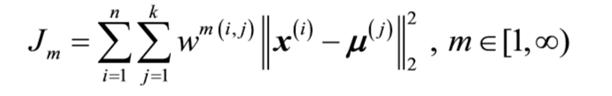

In [15]:
Image(filename='./image/ch11/image4.jpg', width=500) 

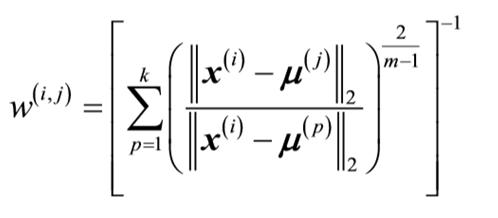

In [16]:
Image(filename='./image/ch11/image5.jpg', width=500) 

## Using the elbow method to find the optimal number of clusters

비지도 학습 모델은 성능 평가를 위해 본질적인 방법 예를 들어 within-cluster SSE (distortion)을 사용할 수 밖에 없다..

In [17]:
 print('Distortion: %.2f' % km.inertia_) 

Distortion: 72.48


이러한 within-cluster SSE를 기반으로 우리는 <strong>elbow</strong> method라고 하는 그래피컬한 툴을 사용할 수 있다. 이 방법은 가장 최적의 K 갯수를 추정해 준다.

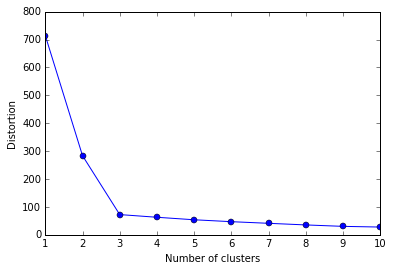

In [18]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) 

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

적절한 k를 정하기 위해서는 Distortion이 급격히 변하기 시작하는 지점을 선택하면 된다. 

## Quantifying the quality of clustering via silhouette plots

Clustering 모델을 평가하는 또다른 정량적 방법은 <strong>silhouette analysis</strong>이다. (이 방법은 k-means 이외 다른 클러스터링 알고리즘에도 사용할 수 있다.) 
<hr>
Silhouette anlysis는 샘플들이 얼마나 타트하게 군집화했는지 측정하는 그래프컬한 도구이다.

1. 군집 내에서 한 샘플과 나머지 각 샘플의 사이의 평균 거리를 계산한다.(응집력)

2. 샘플의 군집 밖 다른 군집 내의 샘플들과의 평균 거리를 계산한다.(분산도)

3. Silhouette coeffieicent는 아래와 같이 cohesion(a)과 separation(b)를 통해 계산해 낸다.
<hr>
즉, 군집 내 거리는 가깝게 군집 간 거리는 멀게

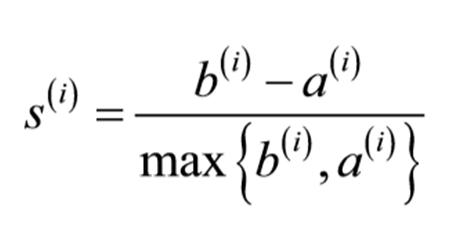

In [19]:
Image(filename='./image/ch11/image6.jpg', width=500) 

각 군집이 얼마나 다른가를 나타내는 b, 군집 내에서 얼마나 유사한가를 나타내는 a

s가 0에 가까울수록 안좋은 군집화, 1에 가까울수록 좋은 군집화

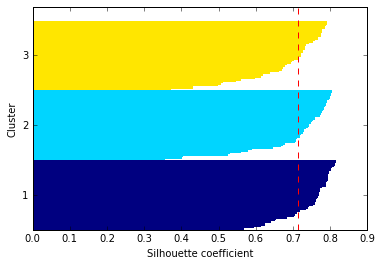

In [20]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0 
yticks = [] 
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

### 비교를 위한 Bad Clustering case

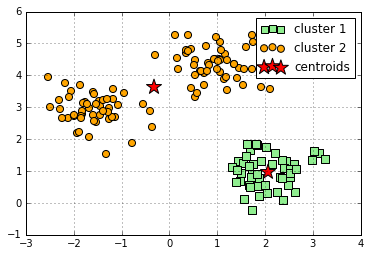

In [21]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=50, c='lightgreen', 
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.show()

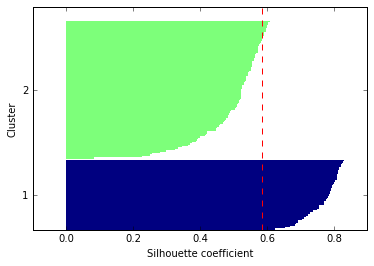

In [23]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, 
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0 
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show() 

## Organizing clusters as a hierarchical tree 

이번에는 prototype-based 방식을 대체하는 <strong style="color: red;">hierarchical clustering</strong> 방식에 대해 알아보겠다.
<hr>
이 hierarchical clustering의 한 가지 이점은 dendrogram으로 표현할 수 있다는 점이다.
또 다른 이점은 cluster의 수를 미리 명세할 필요가 없다는 점이다.

### agglomerative and divisive hierarchical clustering 

 In divisive hierarchical clustering, we start with one cluster that encompasses all our samples, and we iteratively split the cluster into smaller clusters until each cluster only contains one sample. 

In this section, we will focus on <strong>agglomerative clustering</strong>, which takes the opposite approach. We start with each sample as an individual cluster and merge the closest pairs of clusters until only one cluster remains. 

<strong>single linkage</strong> & <strong>complete linkage</strong>

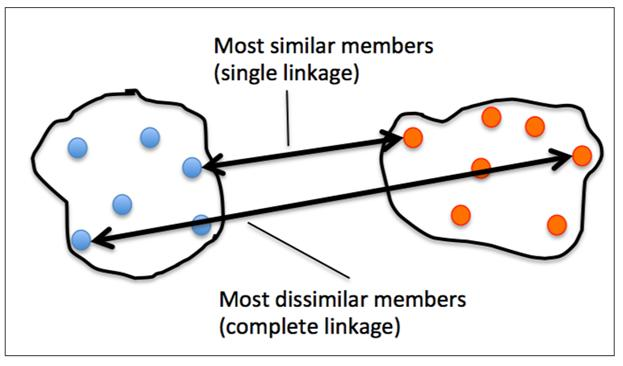

In [24]:
Image(filename='./image/ch11/image7.jpg', width=500) 

1. Compute the distance matrix of all samples. 
2. Represent each data point as a singleton cluster. 
3. Merge the two closest clusters based on the distance of the most dissimilar (distant) members. 
4. Update the similarity matrix. 
5. Repeat steps 2 to 4 until one single cluster remains.

The rows represent different observations (IDs 0 to 4), and the columns are the different features (X, Y, Z) of  those samples:


In [25]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Performing hierarchical clustering on a distance matrix 

distance matrix를 계산하기 위해 SciPy의 spatial.distance 서브모듈을 사용한다.

pdist, squareform을 사용해 pair-wise한 계산을 할 수 있다.

In [26]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(
        pdist(df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


이제 complete linkage agglomeration을 하기 위해 SciPy의 linkage 서브모듈을 사용할 것이다. 이를 사용하여 linkage matrix를 얻을 수 있다.

In [27]:
from scipy.cluster.hierarchy import linkage
help(linkage) 

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering on the condensed
    distance matrix y.
    
    y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A 4 by :math:`(n-1)` matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
    observations in the newly formed cluster.
    
    The following linkage methods are used to compute the distance
    

In [29]:
row_clusters = linkage(pdist(df, metric='euclidean'),
                       method='complete') 

In [31]:
 pd.DataFrame(row_clusters,
              columns=['row label 1',
                       'row label 2',
                       'distance',
                       'no. of items in clust.'],
              index=['cluster %d' %(i+1) for i in
                     range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0,4,3.835396,2
cluster 2,1,2,4.347073,2
cluster 3,3,5,5.899885,3
cluster 4,6,7,8.316594,5


각 row는 merge를 나타낸다.

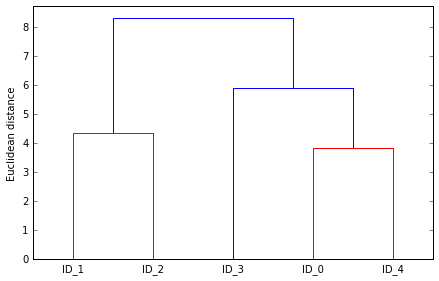

In [33]:
from scipy.cluster.hierarchy import dendrogram 
# make dendrogram black (part 1/2) 
# from scipy.cluster.hierarchy import set_link_color_palette 
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters,
                        labels=labels,
                        # make dendrogram black (part 2/2)
                        # color_threshold=np.inf
                       ) 
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show() 

## Attaching dendrograms to a heat map

## Applying agglomerative clustering via scikit-learn 

In [34]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


(ID_0, ID_3, ID_4) & (ID_1, ID_2)

## Locating regions of high density via DBSCAN

<strong>Density-based Spatial Clustering of Applications with Noise(DBSCAN)</strong>

The notion of density  in DBSCAN is defined as the number of points within a specified radius ε . 

In DBSCAN, a special label is assigned to each sample (point) using the  following criteria: 

• A point is considered as <strong>core point</strong> if at least a specified number (MinPts) of neighboring points fall within the specified radius ε 

• A <strong>border point</strong> is a point that has fewer neighbors than MinPts within ε ,  but lies within the ε radius of a core point

• All other points that are neither core nor border points are considered as <strong>noise points</strong>

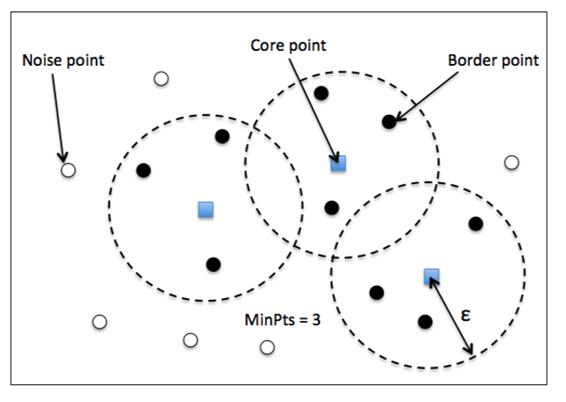

In [2]:
Image(filename='./image/ch11/image8.jpg', width=500) 

DBSCAN의 주요 장점은 군집이 구체를 형성하고 있다고 가정하지 않는다는 것이다. DBSCAN은 어떠한 포인트를 꼭 군집에 할당하지 않고 가능하다면 noice points로 취급해 지워버릴 수도 있다.

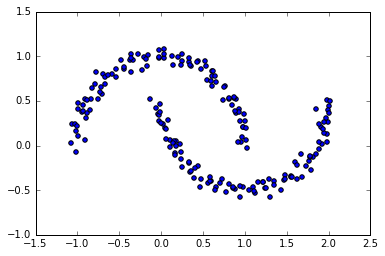

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)
plt.scatter(X[:,0], X[:,1]) 
plt.show()

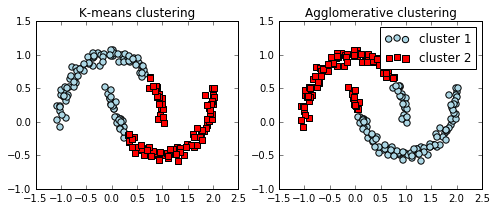

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2,
            random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
            X[y_km==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km==1,0],
            X[y_km==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
            X[y_ac==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

시각화한 결과를 봤을 때, K-means와 agglomerative 모두 좀 이상한 형태로 군집화 시켰다.

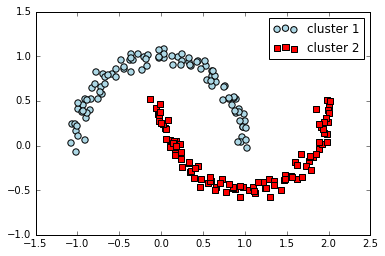

In [37]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
plt.legend()
plt.show()

DBSCAN은 성공적으로 군집화시켰다. 

하지만 DBSCAN 역시 단점을 가지고 있다. dataset의 feature의 수가 늘수록 차원의 저주에 빠질 수 있다. 하지만 이러한 차원의 저주는 Euclidean distance metric을 사용하는 다른 곳에서도 발생할 수 있는 문제이다. (k-means와 hierarchical clustering에서도 발생할 수 있음)

MinPt와 앱실론(반지름) 이 두 개의 파라미터를 잘 찾으면 좋은 군집 결과를 가져오지면 dataset이 상대적으로 커지게 되면 좋은 파라미터 조합을 찾는 것이 쉽지 않다


실전에서 주어진 데이터에 best로 동작하는 알고리즘은 명확하지 않다. 또한 다 차원의 데이터의 경우 오늘 예제들처럼 시각화해서 보기도 어렵다. 성공적인 군집을 위해서는 알고리즘과 하이퍼 파라미터 이외에도 적절한 distance metric과 도메인 지식을 잘 사용해야 한다. 